# General EDA

In [1]:
# referenced: https://medium.com/ml-research-lab/chapter-4-knowledge-from-the-data-and-data-exploration-analysis-99a734792733
# https://amueller.github.io/aml/01-ml-workflow/01-data-loading.html

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
sns.set() # Setting seaborn as default style even if use only matplotlib
pd.set_option('display.max_rows', None)

In [3]:
# import os
# os.chdir('..')
# os.getcwd()

In [4]:
# from src.modules import connect_lhl

In [5]:
# test_conn = connect_lhl.lhl_delay_data('lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com','mid_term_project','lhl_student','lhl_student',0)
# test_conn.connection()
# x = test_conn.sample_table('flights',100)

In [6]:
df_flights = pd.read_csv(r'..\csvs\flights_random_sample.csv', sep=',')
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,986,1.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,1099,0.0,0.0,11.0,0.0,35.0,NaN,NaN,NaN,NaN
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,197,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
df_flights.shape

(100998, 42)

# Step 1 - Investigate Null Values

In [8]:
df_flights.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                  284
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                 1573
dep_delay                1618
taxi_out                 1660
wheels_off               1660
wheels_on                1695
taxi_in                  1695
crs_arr_time                0
arr_time                 1659
arr_delay                1888
cancelled                   0
cancellation_code       99360
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time      1867
air_time                 1903
flights                     0
distance                    0
carrier_de

In [9]:
# percentage of nulls in each column

100*(df_flights.isnull().sum()/len(df_flights))

fl_date                  0.000000
mkt_unique_carrier       0.000000
branded_code_share       0.000000
mkt_carrier              0.000000
mkt_carrier_fl_num       0.000000
op_unique_carrier        0.000000
tail_num                 0.281194
op_carrier_fl_num        0.000000
origin_airport_id        0.000000
origin                   0.000000
origin_city_name         0.000000
dest_airport_id          0.000000
dest                     0.000000
dest_city_name           0.000000
crs_dep_time             0.000000
dep_time                 1.557457
dep_delay                1.602012
taxi_out                 1.643597
wheels_off               1.643597
wheels_on                1.678251
taxi_in                  1.678251
crs_arr_time             0.000000
arr_time                 1.642607
arr_delay                1.869344
cancelled                0.000000
cancellation_code       98.378186
diverted                 0.000000
dup                      0.000000
crs_elapsed_time         0.000000
actual_elapsed

In [10]:
# drop features with more than 80% missing values

df_flights = df_flights.dropna(thresh=df_flights.shape[0]*0.8,axis=1)

In [11]:
df_flights.shape

(100998, 32)

In [12]:
100*(df_flights.isnull().sum()/len(df_flights))

fl_date                0.000000
mkt_unique_carrier     0.000000
branded_code_share     0.000000
mkt_carrier            0.000000
mkt_carrier_fl_num     0.000000
op_unique_carrier      0.000000
tail_num               0.281194
op_carrier_fl_num      0.000000
origin_airport_id      0.000000
origin                 0.000000
origin_city_name       0.000000
dest_airport_id        0.000000
dest                   0.000000
dest_city_name         0.000000
crs_dep_time           0.000000
dep_time               1.557457
dep_delay              1.602012
taxi_out               1.643597
wheels_off             1.643597
wheels_on              1.678251
taxi_in                1.678251
crs_arr_time           0.000000
arr_time               1.642607
arr_delay              1.869344
cancelled              0.000000
diverted               0.000000
dup                    0.000000
crs_elapsed_time       0.000000
actual_elapsed_time    1.848551
air_time               1.884196
flights                0.000000
distance

In [13]:
# because remaining features with missing values make up such a small proportino of the data, drop observations with missing values

df_flights.dropna(inplace=True)

In [14]:
sum(df_flights.isnull().sum())

0

# Step 2 - Variable Identification

In [15]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99030 entries, 0 to 100997
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fl_date              99030 non-null  object 
 1   mkt_unique_carrier   99030 non-null  object 
 2   branded_code_share   99030 non-null  object 
 3   mkt_carrier          99030 non-null  object 
 4   mkt_carrier_fl_num   99030 non-null  int64  
 5   op_unique_carrier    99030 non-null  object 
 6   tail_num             99030 non-null  object 
 7   op_carrier_fl_num    99030 non-null  int64  
 8   origin_airport_id    99030 non-null  int64  
 9   origin               99030 non-null  object 
 10  origin_city_name     99030 non-null  object 
 11  dest_airport_id      99030 non-null  int64  
 12  dest                 99030 non-null  object 
 13  dest_city_name       99030 non-null  object 
 14  crs_dep_time         99030 non-null  int64  
 15  dep_time             99030 non-null

In [16]:
df_flights.dtypes.value_counts()

object     11
int64      11
float64    10
dtype: int64

In [17]:
flights_features = df_flights.drop(columns='arr_delay')
flights_features.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance'],
      dtype='object')

In [18]:
target = df_flights['arr_delay']

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

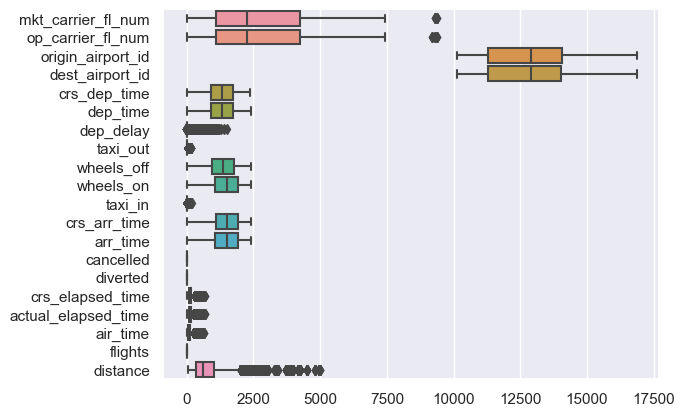

In [19]:
sns.boxplot(data=flights_features, orient='h')

Categorical Variables:
- Nominal data = categorizes and labels variables
- Ordinal data = categorizes and labels variables + ranks categories in order

Quantitative Variables:
- Interval data = categorizes and labels variables + ranks categories in order + has known, equal intervals
- Ratio data = categorizes and labels variables + ranks categories in order + has known, equal intervals + has a true or meaningful zero (can't have less than 0)

In [20]:
# <class 'pandas.core.frame.DataFrame'>
# Int64Index: 99030 entries, 0 to 100997
# Data columns (total 32 columns):
#  #   Column               Non-Null Count  Dtype  
# ---  ------               --------------  -----  
#  0   fl_date              99030 non-null  object  quantitative - interval (datetime) 
#  1   mkt_unique_carrier   99030 non-null  object  categorical - nominal
#  2   branded_code_share   99030 non-null  object  categorical - nominal 
#  3   mkt_carrier          99030 non-null  object  categorical - nominal 
#  4   mkt_carrier_fl_num   99030 non-null  int64   categorical - nominal  
#  5   op_unique_carrier    99030 non-null  object  categorical - nominal 
#  6   tail_num             99030 non-null  object  categorical - nominal  
#  7   op_carrier_fl_num    99030 non-null  int64   categorical - nominal   
#  8   origin_airport_id    99030 non-null  int64   categorical - nominal   
#  9   origin               99030 non-null  object  categorical - nominal  
#  10  origin_city_name     99030 non-null  object  categorical - nominal  
#  11  dest_airport_id      99030 non-null  int64   categorical - nominal   
#  12  dest                 99030 non-null  object  categorical - nominal  
#  13  dest_city_name       99030 non-null  object  categorical - nominal  
#  14  crs_dep_time         99030 non-null  int64   quantitative - interval (datetime)  
#  15  dep_time             99030 non-null  float64 quantitative - interval (datetime)
#  16  dep_delay            99030 non-null  float64 quantitative - ratio     
#  17  taxi_out             99030 non-null  float64 quantitative - ratio
#  18  wheels_off           99030 non-null  float64 quantitative - interval (datetime) 
#  19  wheels_on            99030 non-null  float64 quantitative - interval (datetime)
#  20  taxi_in              99030 non-null  float64 quantitative - ratio
#  21  crs_arr_time         99030 non-null  int64   quantitative - interval (datetime)     
#  22  arr_time             99030 non-null  float64 quantitative - interval (datetime)   
#  23  arr_delay            99030 non-null  float64 quantitative - ratio 
#  24  cancelled            99030 non-null  int64   categorical - nominal (boolean)     
#  25  diverted             99030 non-null  int64   categorical - nominal (boolean)     
#  26  dup                  99030 non-null  object  categorical - nominal   
#  27  crs_elapsed_time     99030 non-null  int64   quantitative - ratio (scheduled elapsed time of flight, in minutes)     
#  28  actual_elapsed_time  99030 non-null  float64 quantitative - ratio (actual elapsed time of flight, in minutes)
#  29  air_time             99030 non-null  float64 quantitative - ratio 
#  30  flights              99030 non-null  int64   quantitative - ratio     
#  31  distance             99030 non-null  int64   quantitative - ratio 
# dtypes: float64(10), int64(11), object(11)
# memory usage: 24.9+ MB

In [21]:
# create subset of flights dataframe with quantitative ratio data only

quant_ratio_df = df_flights[[
    'dep_delay',
    'taxi_out',
    'taxi_in',
    'crs_elapsed_time',
    'actual_elapsed_time', 
    'flights',
    'distance',
    'air_time'
    ]]

In [22]:
# create subset of flights dataframe with quantitative interval data only

quant_interval_df = df_flights[[
    'fl_date',
    'crs_dep_time',
    'dep_time',
    'wheels_off',
    'wheels_on',
    'crs_arr_time',
    'arr_time',
]]

In [23]:
# create subset of flights dataframe with all quantitative data

numeric_df = pd.concat([quant_ratio_df, quant_interval_df], axis=1)

In [24]:
# create # create subset of flights dataframe with all categorical data

cat_nom_feats = flights_features.drop(columns=list(numeric_df.columns))
cat_nom_feats.head()

,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,cancelled,diverted,dup
0,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,"Las Vegas, NV",13851,OKC,"Oklahoma City, OK",0,0,N
1,WN,WN,WN,989,WN,N287WN,989,12889,LAS,"Las Vegas, NV",13871,OMA,"Omaha, NE",0,0,N
2,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,"Las Vegas, NV",13871,OMA,"Omaha, NE",0,0,N
3,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,"Las Vegas, NV",13891,ONT,"Ontario, CA",0,0,N
4,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,"Las Vegas, NV",13891,ONT,"Ontario, CA",0,0,N


# Step 2 - Univariate Analysis

### Quantitative Variables

For continuous variables: We can build histograms and boxplots for each continuous variable independently. These figures give us an understanding about the variables’ central tendencies and spread.

In [25]:
numeric_df.describe()

,dep_delay,taxi_out,taxi_in,crs_elapsed_time,actual_elapsed_time,flights,distance,air_time,crs_dep_time,dep_time,wheels_off,wheels_on,crs_arr_time,arr_time
count,99030.000000,99030.000000,99030.000000,99030.000000,99030.000000,99030.0,99030.000000,99030.000000,99030.000000,99030.000000,99030.000000,99030.000000,99030.000000,99030.000000
mean,10.511360,17.485075,7.692780,138.941361,133.821640,1.0,776.844461,108.643785,1328.863021,1334.268050,1358.591457,1460.750944,1485.210219,1465.263274
std,46.197188,10.027598,6.186461,71.735898,71.672477,0.0,586.809742,69.661940,488.569537,502.842881,504.275344,531.700053,515.629802,536.089659
min,-35.000000,0.000000,0.000000,22.000000,20.000000,1.0,31.000000,9.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,-6.000000,11.000000,4.000000,88.000000,82.000000,1.0,347.000000,58.000000,915.000000,919.000000,934.000000,1046.000000,1102.000000,1050.000000
50%,-2.000000,15.000000,6.000000,120.000000,116.000000,1.0,612.000000,90.000000,1320.000000,1327.000000,1341.000000,1500.000000,1511.500000,1504.000000
75%,6.000000,20.000000,9.000000,169.000000,164.000000,1.0,1014.000000,138.000000,1734.000000,1743.000000,1758.000000,1911.000000,1918.000000,1916.000000
max,1503.000000,162.000000,182.000000,679.000000,693.000000,1.0,4983.000000,660.000000,2359.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000


In [26]:
# taxi_out and taxi_in minimum values of 0 are likely null values, since taxi time cannot actually be zero

In [27]:
df_flights[df_flights['taxi_in']==0]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
14552,2018-11-09,HA,HA_CODESHARE,HA,623,EM,N805HC,623,13034,LNY,...,2003.0,-9.0,0,0,N,32,27.0,25.0,1,72
14799,2018-11-11,HA,HA_CODESHARE,HA,614,EM,N804HC,614,12173,HNL,...,1502.0,-12.0,0,0,N,30,29.0,19.0,1,54
41637,2019-11-16,HA,HA_CODESHARE,HA,602,EM,N801HC,602,12173,HNL,...,721.0,-5.0,0,0,N,31,28.0,18.0,1,54
41639,2019-11-16,HA,HA_CODESHARE,HA,624,EM,N801HC,624,12173,HNL,...,917.0,-14.0,0,0,N,35,30.0,19.0,1,72
96551,2019-07-02,HA,HA_CODESHARE,HA,634,EM,N804HC,634,12173,HNL,...,1120.0,-5.0,0,0,N,34,31.0,21.0,1,72


In [28]:
df_flights[df_flights['taxi_out']==0]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
14549,2018-11-09,HA,HA_CODESHARE,HA,619,EM,N805HC,619,13347,MKK,...,1609.0,1.0,0,0,N,28,23.0,19.0,1,54
14803,2018-11-11,HA,HA_CODESHARE,HA,619,EM,N804HC,619,13347,MKK,...,1612.0,4.0,0,0,N,28,29.0,20.0,1,54


In [29]:
# very few nulls - so just drop 

In [30]:
df_flights = df_flights.replace({"taxi_out" : {0: np.nan},"taxi_in" : {0: np.nan}})

In [31]:
df_flights.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               2
wheels_off             0
wheels_on              0
taxi_in                5
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
dtype: int64

In [32]:
df_flights.dropna(inplace=True)

In [33]:
df_flights.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
dtype: int64

In [34]:
#Import the module
import pickle

#Do Some Feature Engineering
cleaned_data = df_flights

#Dump it(save it in binary format)
with open('flight_data.pickle','wb') as flight_data_file:
     pickle.dump(cleaned_data, flight_data_file)

In [35]:
#Import the module
import pickle

#Load the data - No need to do Feature Engineering again
with open('flight_data.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

#Continue with your modeling

In [36]:
def uni_analyis_continuous(df, feature, feature_title):
    
    import matplotlib.pyplot as plt
    import matplotlib.transforms as mtrans

    fig, axes = plt.subplots(1,2, sharex=False, figsize=(10,5))
    fig.suptitle(f'Univariate Analysis - {feature_title}')

    sns.boxplot(ax=axes[0], data=df[feature])
    axes[0].set_title(f'{feature_title} Boxplot')
    sns.histplot(ax=axes[1], data=df[feature])
    axes[1].set_title(f'{feature_title} Histogram')

    Minimum = min(df[feature])
    Median = df[feature].median()
    Mean = df[feature].mean()
    Maximum = max(df[feature])
    
    trans = mtrans.blended_transform_factory(fig.transFigure, mtrans.IdentityTransform())

    txt = fig.text(0.5,10, f'Minimum : {Minimum}, Median : {Median}, Mean : {Mean}, Maximum : {Maximum}', ha='center', va='center_baseline')
    txt.set_transform(trans)

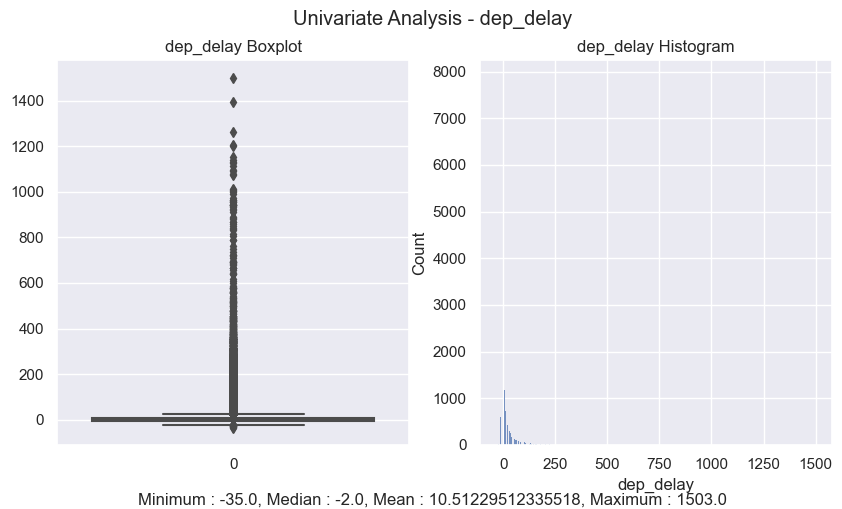

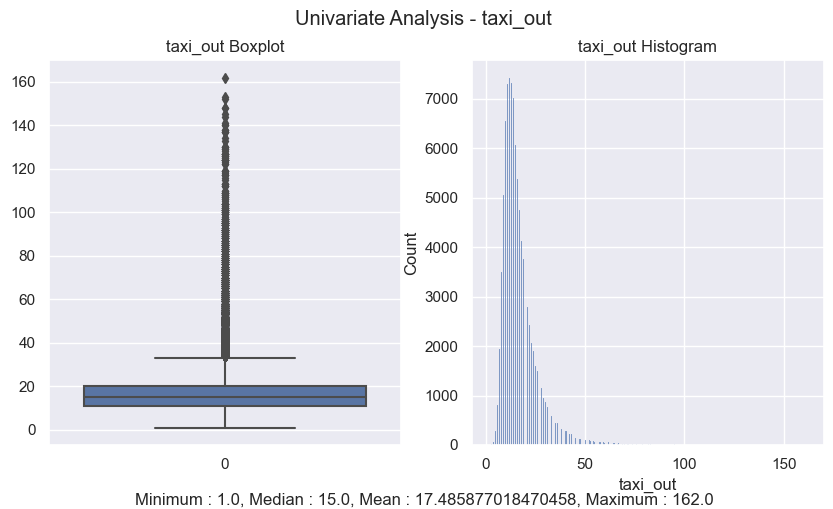

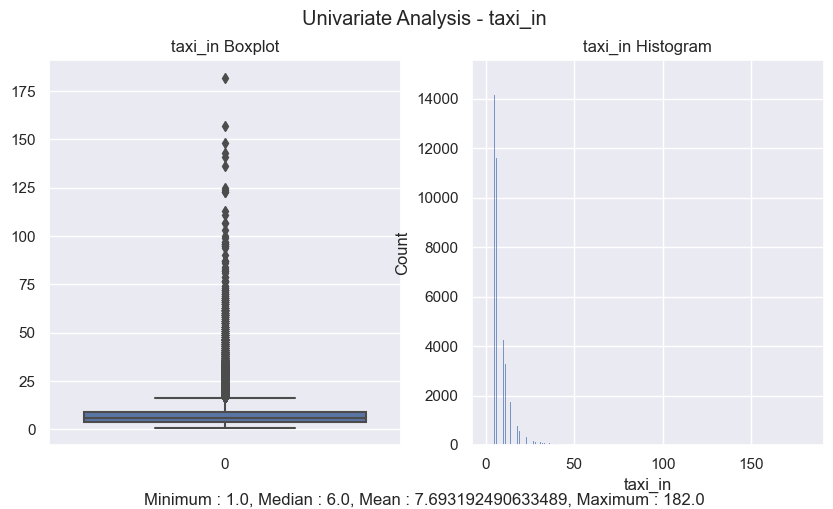

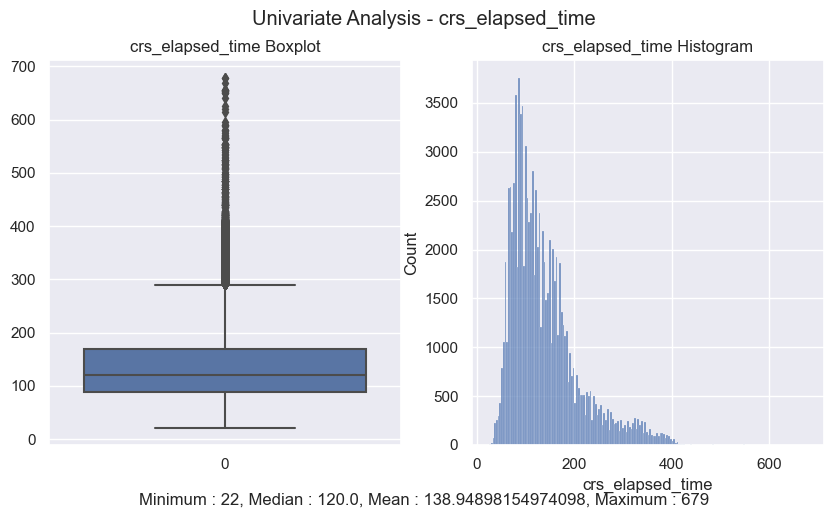

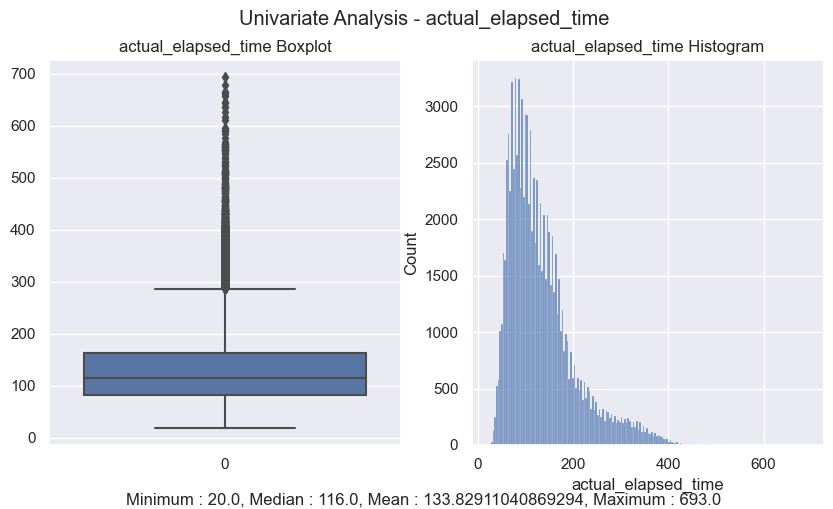

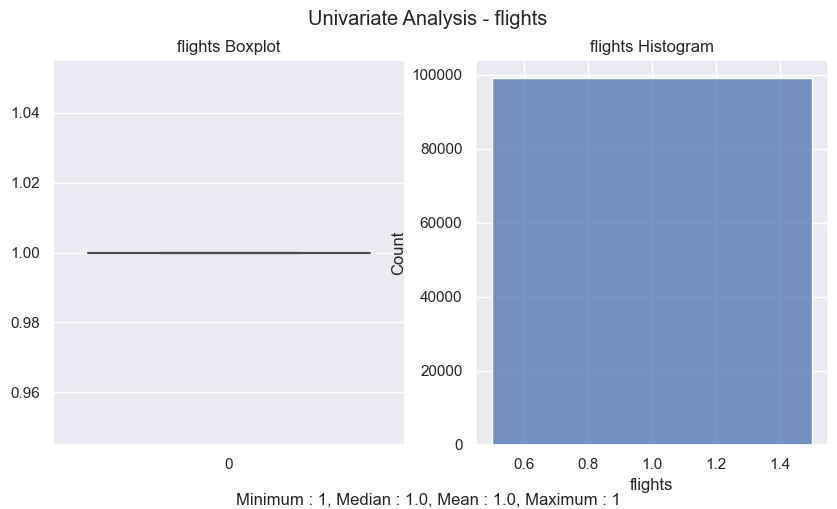

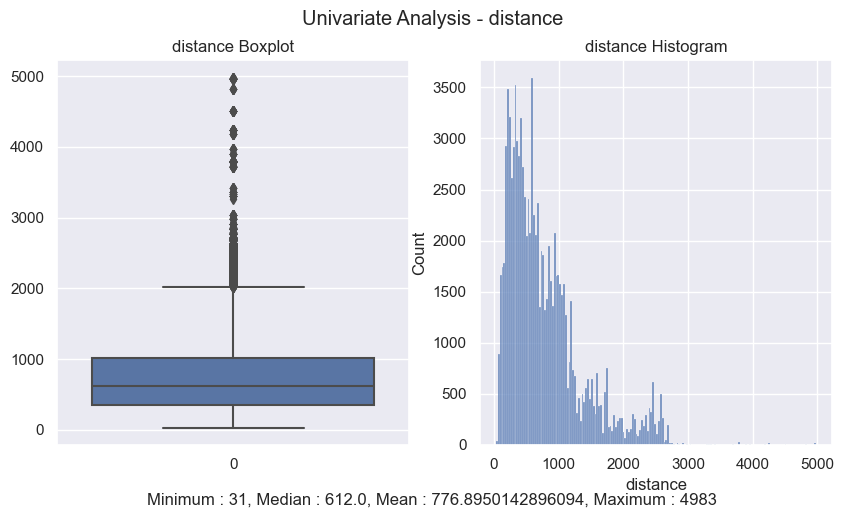

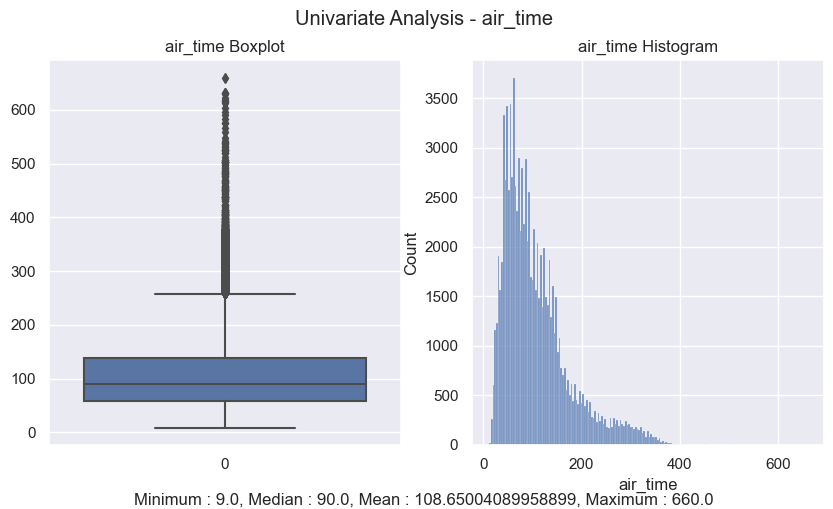

In [37]:
for feat in quant_ratio_df:
    uni_analyis_continuous(df_flights, feature=feat, feature_title=feat)

Much of this data is very skewed - perform log transformations before building model

### Categorical Variables

For categorical variables: Create a count plot visualization that shows the frequencies in each category.

In [38]:
def uni_analyis_categorical(df, feature):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.transforms as mtrans

    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(data = df, y = feature, order = df[feature].value_counts().index, orient='h', palette = 'magma')
    plt.title(f'{feature} frequency')

    cat_count = df[feature].nunique()

    trans = mtrans.blended_transform_factory(fig.transFigure, mtrans.IdentityTransform())

    txt = fig.text(0, 10, f'Number of categories : {cat_count}', ha='center')
    txt.set_transform(trans)

In [39]:
cat_nom_feats.columns

Index(['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'cancelled', 'diverted',
       'dup'],
      dtype='object')

In [40]:
for cat in cat_nom_feats.columns:
    print(f'{cat} unique values: {df_flights[cat].nunique()}')

mkt_unique_carrier unique values: 10
branded_code_share unique values: 15
mkt_carrier unique values: 10
mkt_carrier_fl_num unique values: 6770
op_unique_carrier unique values: 27
tail_num unique values: 6150
op_carrier_fl_num unique values: 6772
origin_airport_id unique values: 368
origin unique values: 368
origin_city_name unique values: 361
dest_airport_id unique values: 370
dest unique values: 370
dest_city_name unique values: 363
cancelled unique values: 1
diverted unique values: 1
dup unique values: 1


In [41]:
df_flights[['origin_airport_id',
'origin',
'origin_city_name',
'dest_airport_id',
'dest',
'dest_city_name']].head()

,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name
0,12889,LAS,"Las Vegas, NV",13851,OKC,"Oklahoma City, OK"
1,12889,LAS,"Las Vegas, NV",13871,OMA,"Omaha, NE"
2,12889,LAS,"Las Vegas, NV",13871,OMA,"Omaha, NE"
3,12889,LAS,"Las Vegas, NV",13891,ONT,"Ontario, CA"
4,12889,LAS,"Las Vegas, NV",13891,ONT,"Ontario, CA"


In [42]:
df_flights[['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier']].head()

,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier
0,WN,WN,WN,5431,WN
1,WN,WN,WN,989,WN
2,WN,WN,WN,1664,WN
3,WN,WN,WN,1106,WN
4,WN,WN,WN,1559,WN


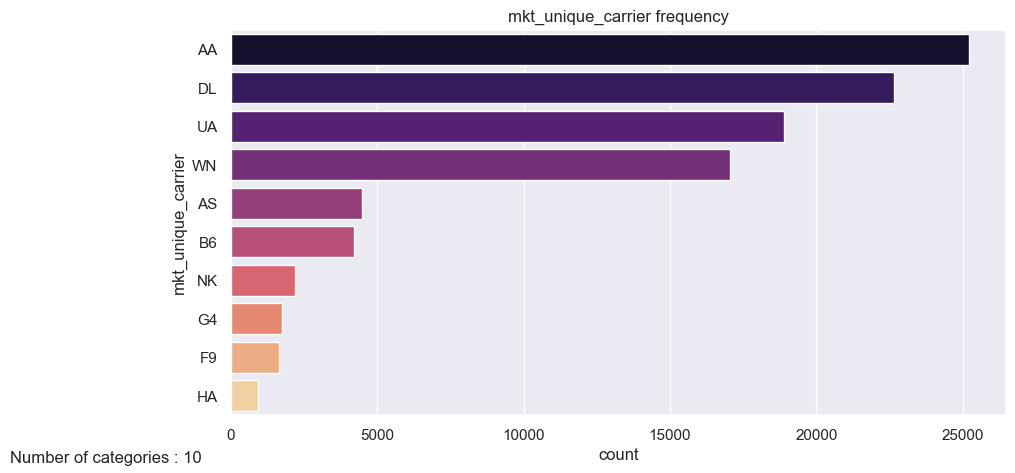

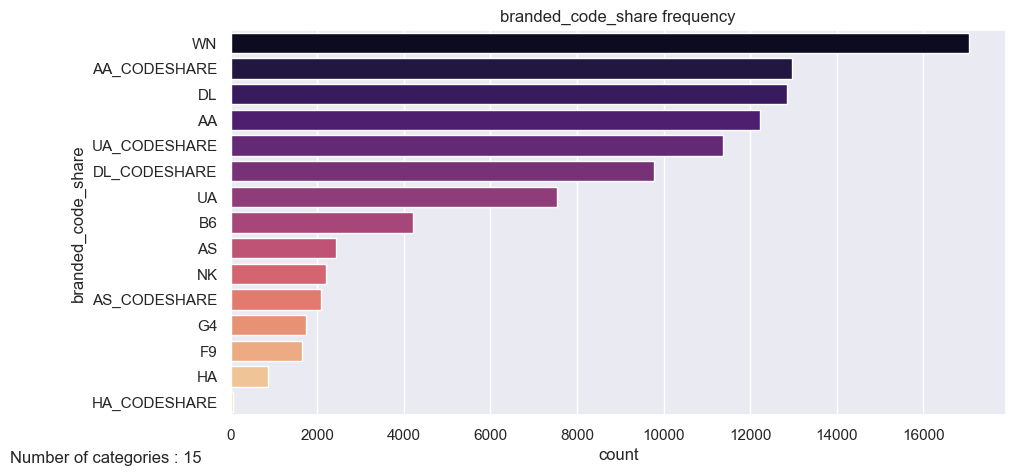

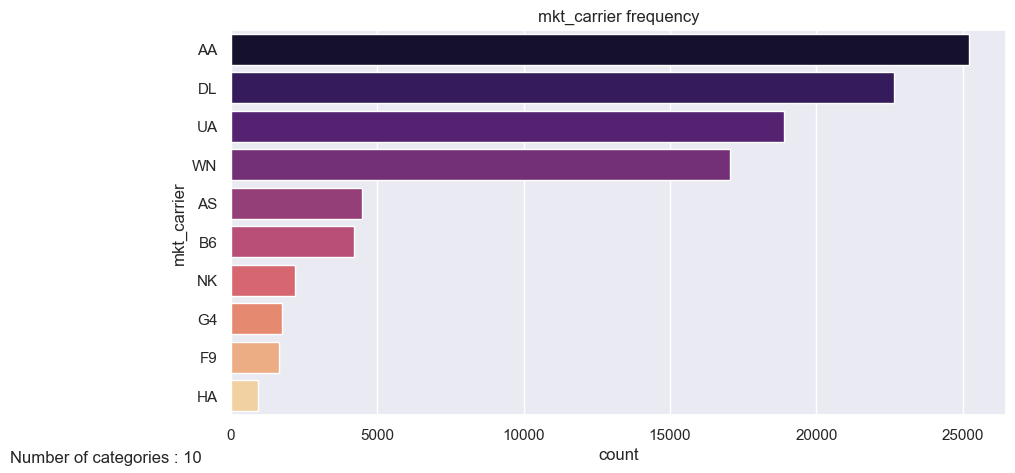

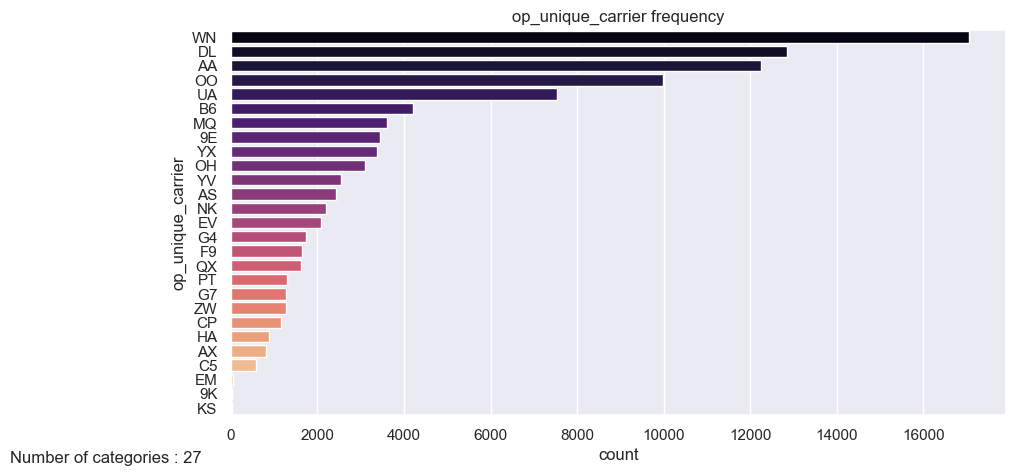

In [43]:
for feat in ['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier','op_unique_carrier']:
    uni_analyis_categorical(df_flights, feature=feat)

### Explore the Target Variable

In [44]:
# descriptive statistics

df_flights['arr_delay'].describe()

count    99023.000000
mean         5.392424
std         48.508627
min        -68.000000
25%        -15.000000
50%         -6.000000
75%          8.000000
max       1516.000000
Name: arr_delay, dtype: float64

<AxesSubplot: xlabel='arr_delay', ylabel='Count'>

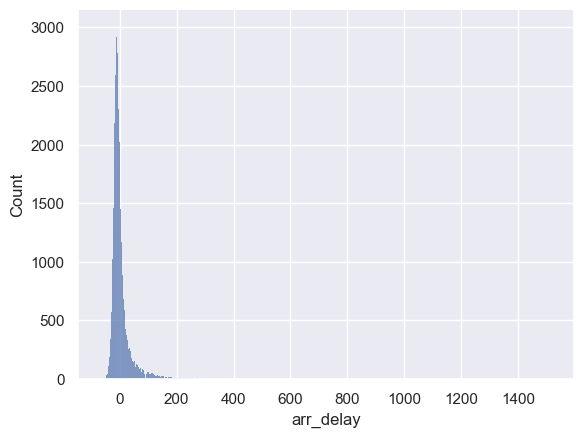

In [45]:
# histogram

sns.histplot(df_flights['arr_delay'])

# Step 3 - Bi-Variate Analysis

In [46]:
quant_ratio_df.columns

Index(['dep_delay', 'taxi_out', 'taxi_in', 'crs_elapsed_time',
       'actual_elapsed_time', 'flights', 'distance', 'air_time'],
      dtype='object')

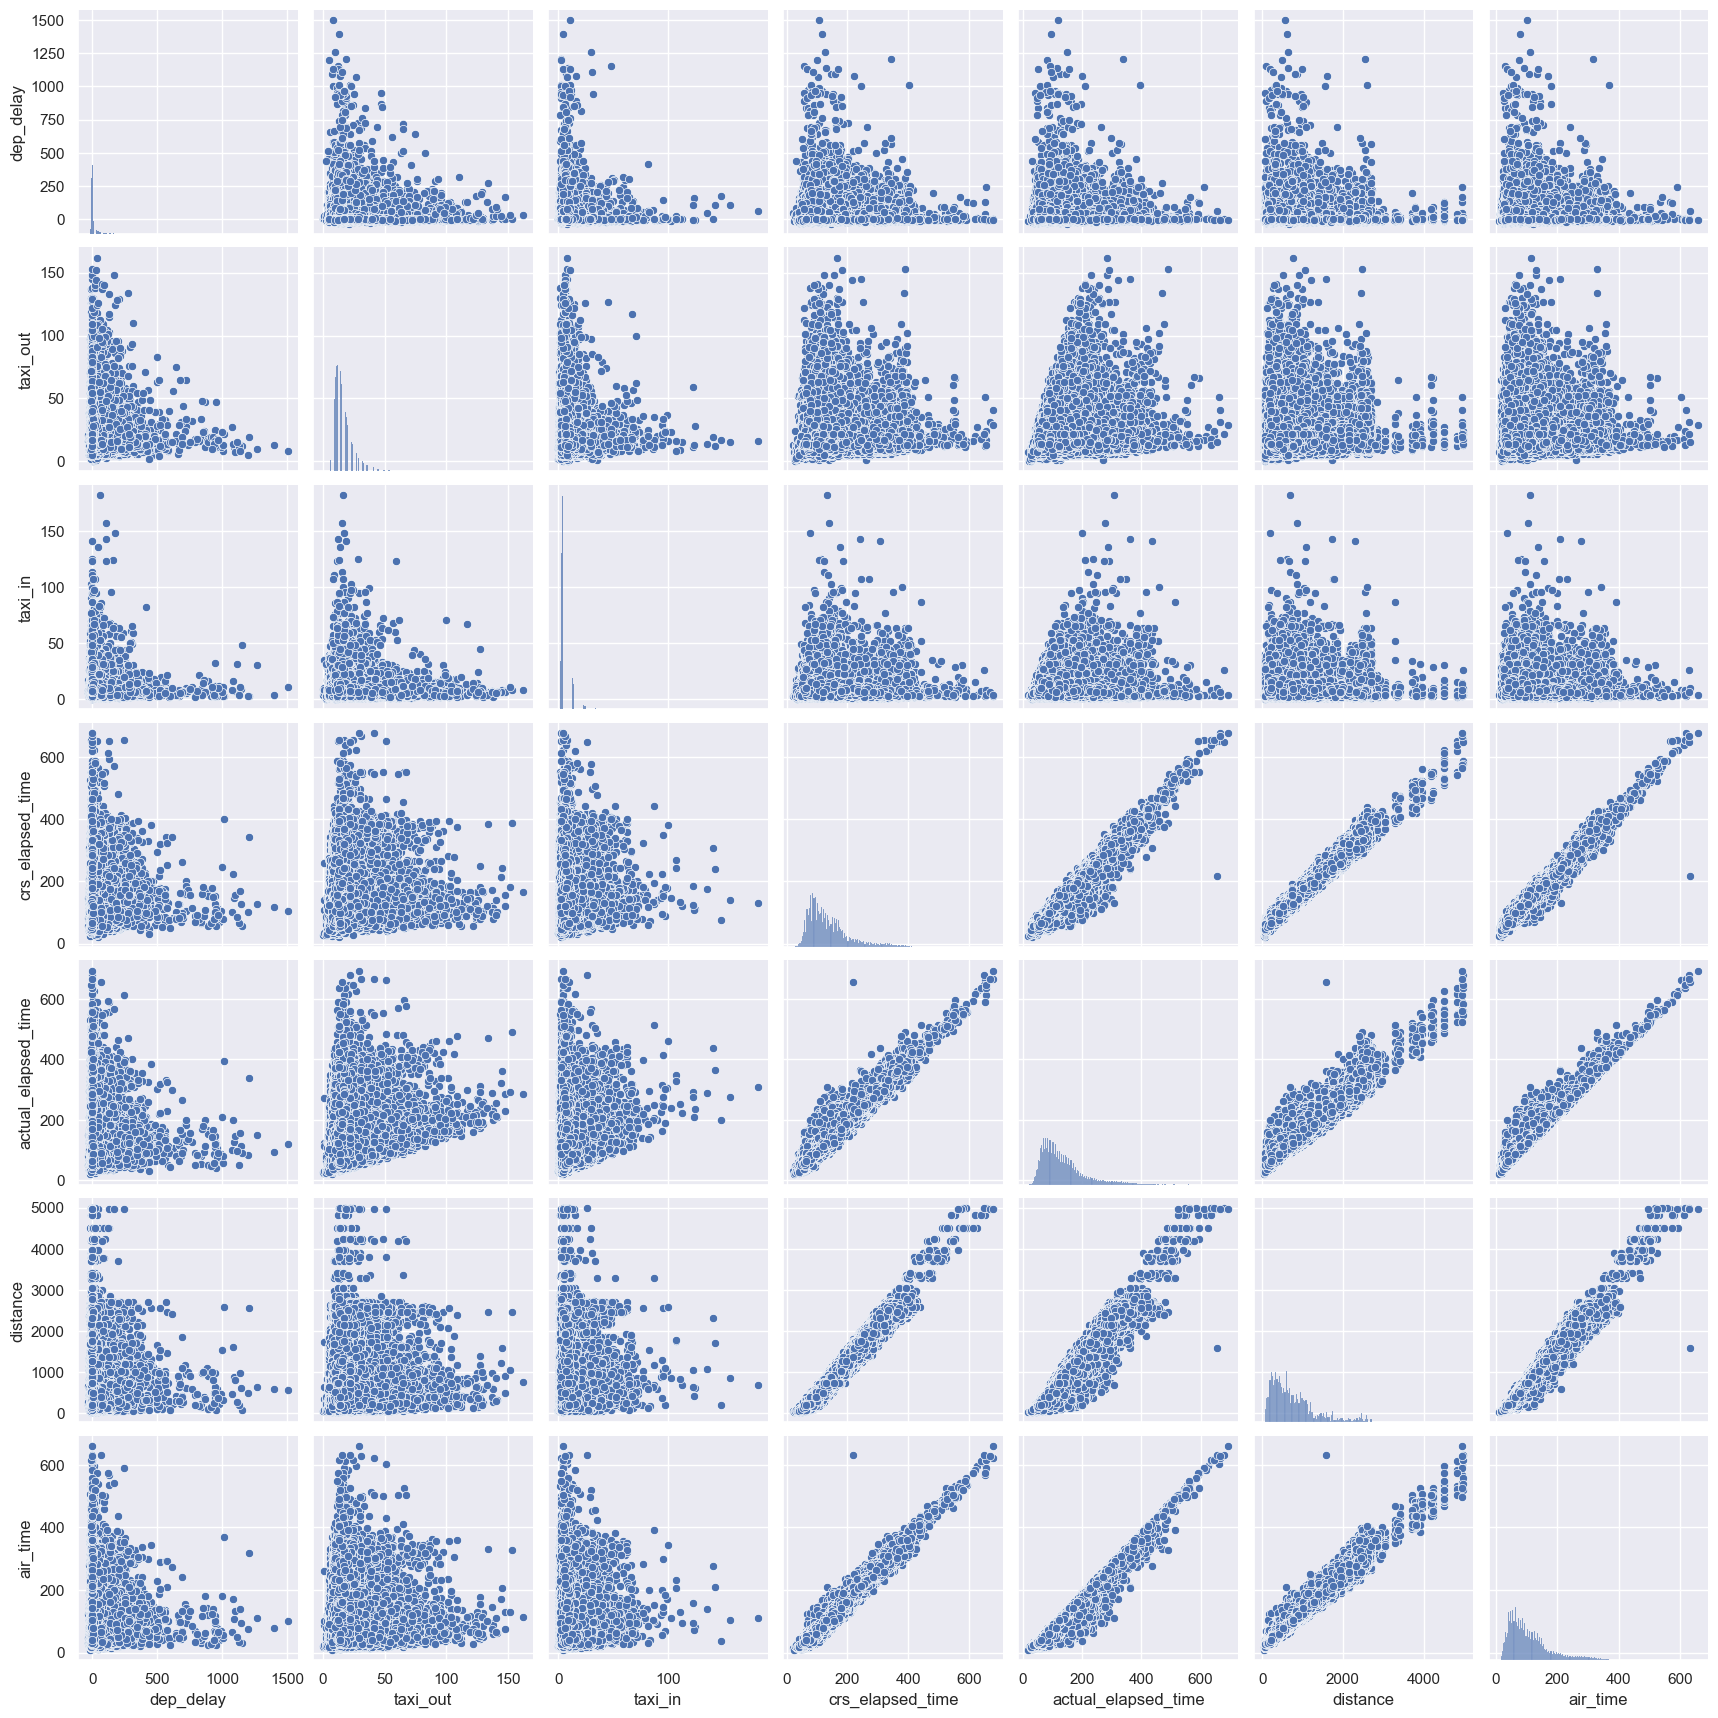

In [47]:
sns.pairplot(quant_ratio_df.drop(columns='flights'))

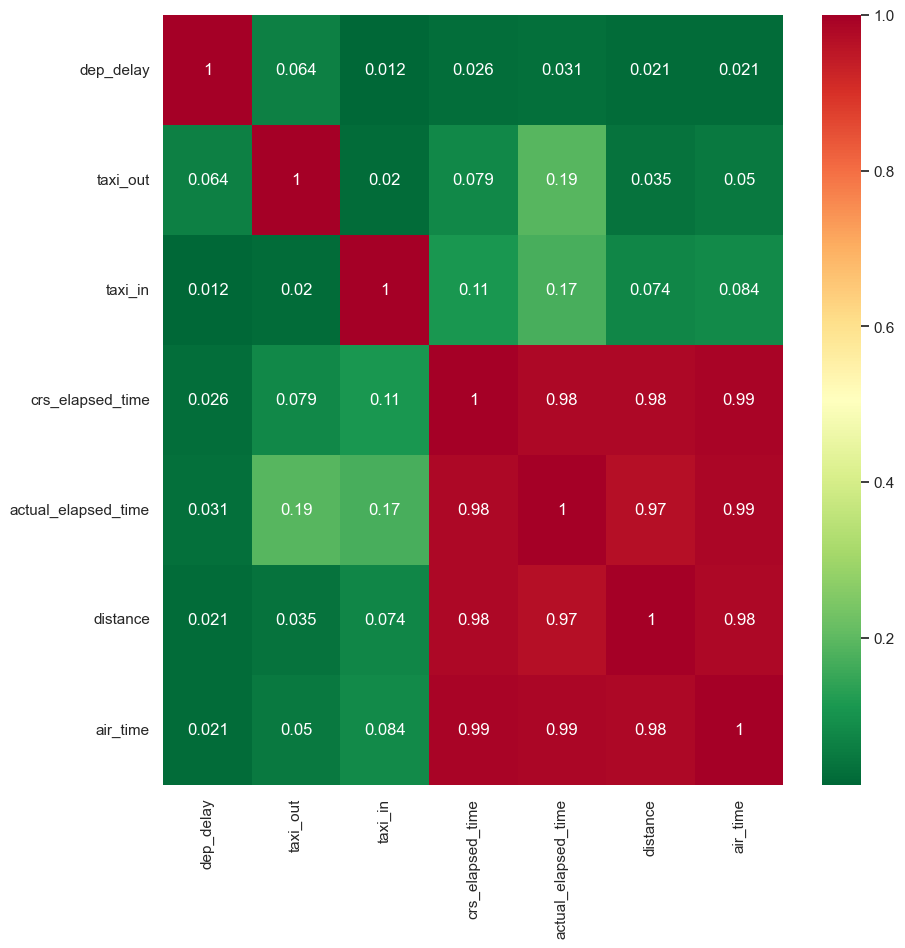

In [48]:
corrmat = quant_ratio_df.drop(columns='flights').corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn_r")

Because certain features are highly correlated, we will need to apply dimensionality reduction.